In [3]:
import numpy as np
import matplotlib.pyplot as plt

The red arrows, eigenvector corresponding to largest eigenvalue, describe data better than the green arrows.

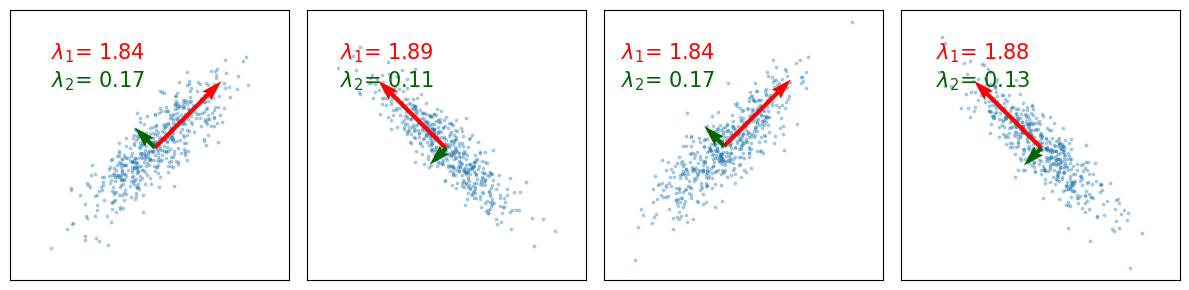

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
angles = [-20, -80, 20, 80]

for i, angle in enumerate(angles):
    theta = np.radians(angle)
    X = np.random.multivariate_normal([0, 0], [[1, 0.9], [0.9, 1]], 500)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    X_rotated = X @ rotation_matrix

    # Standardize the rotated data
    X_mean_rotated = np.mean(X_rotated, axis=0)
    X_std_rotated = np.std(X_rotated, axis=0)
    B_rotated = (X_rotated - X_mean_rotated) / X_std_rotated

    # Perform PCA on the rotated data
    C_rotated = B_rotated.T @ B_rotated / (len(B_rotated) - 1)
    eigenvalues_rotated, eigenvectors_rotated = np.linalg.eigh(C_rotated)
    sorted_indices = np.argsort(eigenvalues_rotated)[::-1]
    eigenvalues_rotated = eigenvalues_rotated[sorted_indices]
    eigenvectors_rotated = eigenvectors_rotated[:, sorted_indices]

    # Plot the data
    axes[i].scatter(B_rotated[:, 0], B_rotated[:, 1], s=3, alpha=0.3)
    for j, color in enumerate(['red', 'darkgreen']):  # Plot only the first k principal components
        end_point = eigenvectors_rotated[:, j] * np.sqrt(eigenvalues_rotated[j]) * 4  # Adjusted scaling factor
        axes[i].quiver(X_mean_rotated[0], X_mean_rotated[1], end_point[0], end_point[1], color=color, scale=2, width=0.015, angles='xy', scale_units='xy')
    axes[i].text(-3, 2.5, f'$\lambda_1$= {eigenvalues_rotated[0]:.2f}', {'color': 'red', 'fontsize': 15})
    axes[i].text(-3, 1.7, f'$\lambda_2$= {eigenvalues_rotated[1]:.2f}', {'color': 'darkgreen', 'fontsize': 15})
    axes[i].axis('equal')
    axes[i].axis()
    axes[i].set_xticks([])
    axes[i].set_yticks([])
plt.tight_layout()
plt.show()